# Project Structure
1. Import Libaray and Data
2. Exploratory Data Analysis
3. Preprocessing/ Cleaning data(missing values handle,outlier removal)
4. Encoding categorical variables
5. Feature Scaling
6. Train Test Split
7. ML Algorithm 1: ANN
8. ML Algorithm 2: Random Forest Regression
9. ML Algorithm 3: XGBoost
10. Model Comparison
11. Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from sklearn.preprocessing import StandardScaler

# **Step 1: Exploratory Data Analysis (EDA)**

# 1.1Understand the Dataset:

In [2]:
df = pd.read_csv("/kaggle/input/airbnb-flight/airbnb.csv")  # unzip if it's a .gz file first

In [3]:
df

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12800,12800,44697740,"Brown Dome House No. 3, full of healing",4.94,16,Aidan,161552316.0,"Imhoe-myeon, Jindo, South Jeolla Province, Sou...","4 guests,8 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...",...,4288,South Korea,8,0,4,0,0,0,3 00 pm - 11 00 pm,11 00 am
12801,12801,29975283,Bubble Hotel Ubud with Bathtub under the Sky,4.67,6,Martha,118954227.0,"Gianyar, Indonesia","2 guests,1 bedroom,1 bed,Toilet with sink","Wifi,Free on-street parking,Air conditioning,G...",...,15200,Indonesia,0,1,2,1,1,0,3 00 pm - 10 00 pm,12 00 pm
12802,12802,32977697,Paradise Eco Hub,4.67,3,Silas,175214568.0,"Kabale, Uganda","2 guests,1 bedroom,2 beds,1 private bathroom","Wifi,Breakfast,Long-term stays allowed,Unavail...",...,9103,Uganda,1,2,2,0,1,0,After 3 00 pm,NaN
12803,12803,8006146,WisDOME - Mentigi Bay Village - Gilis - Lombok,4.86,7,Cempaka,718423.0,"Gunung Sari, Nusa Tenggara Barat, Indonesia","8 guests,2 bedrooms,4 beds,2.5 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,42262,Indonesia,2,4,8,0,2,0,Flexible,12 00 pm


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

In [5]:
df.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


In [6]:
df.isnull().sum()

Unnamed: 0         0
id                 0
name               0
rating             0
reviews            0
host_name          8
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
country            0
bathrooms          0
beds               0
guests             0
toiles             0
bedrooms           0
studios            0
checkin          800
checkout        2450
dtype: int64

here checkin and chekcout coulmns have some missing data which we will handle later

# **1.2Checking Data Destribution**
# Analyzation the target variable (price) and other numerical columns ( rating, reviews,bedrooms , beds, bathrooms)

In [7]:
# Set plot styles
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

In [8]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')

converitng the rating and reviews to numerical variables or else we can’t perform math or scaling

In [9]:
df[['rating', 'reviews']].dtypes

rating     float64
reviews    float64
dtype: object

In [10]:
# Numerical columns relevant for EDA
num_cols = [
    'price', 'rating', 'reviews', 'bedrooms', 'bathrooms',
    'beds', 'guests', 'toiles', 'studios'
]

# Summary stats
df[num_cols].describe(percentiles=[.01, .25, .5, .75, .99])

,price,rating,reviews,bedrooms,bathrooms,beds,guests,toiles,studios
count,1.280500e+04,8567.000000,12804.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000
mean,1.769780e+04,4.857475,36.064511,2.136041,1.874424,3.316751,5.213745,0.019211,0.023585
std,4.569364e+04,0.140803,65.525542,2.359005,2.091399,4.037791,3.808830,0.137272,0.151757
min,3.930000e+02,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1%,9.120000e+02,4.520000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,3.994000e+03,4.770000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000
50%,8.175000e+03,4.890000,10.000000,1.000000,1.000000,2.000000,4.000000,0.000000,0.000000
75%,1.606200e+04,4.980000,42.000000,3.000000,2.000000,4.000000,6.000000,0.000000,0.000000
99%,1.739706e+05,5.000000,310.970000,11.000000,10.000000,18.960000,16.000000,1.000000,1.000000
max,1.907963e+06,5.000000,943.000000,50.000000,50.000000,98.000000,16.000000,1.000000,1.000000


In [11]:
# Check for skewed distribution: Mean >> Median
print("\n Skewness Check (Mean vs Median):\n")
for col in num_cols:
    mean = df[col].mean()
    median = df[col].median()
    print(f"{col}: Mean = {mean:.2f}, Median = {median:.2f}, Skew = {'Right-skewed' if mean > median * 1.5 else 'Symmetric' if abs(mean - median) < 0.1 * mean else 'Left-skewed'}")



 Skewness Check (Mean vs Median):

price: Mean = 17697.80, Median = 8175.00, Skew = Right-skewed
rating: Mean = 4.86, Median = 4.89, Skew = Symmetric
reviews: Mean = 36.06, Median = 10.00, Skew = Right-skewed
bedrooms: Mean = 2.14, Median = 1.00, Skew = Right-skewed
bathrooms: Mean = 1.87, Median = 1.00, Skew = Right-skewed
beds: Mean = 3.32, Median = 2.00, Skew = Right-skewed
guests: Mean = 5.21, Median = 4.00, Skew = Left-skewed
toiles: Mean = 0.02, Median = 0.00, Skew = Right-skewed
studios: Mean = 0.02, Median = 0.00, Skew = Right-skewed


In [12]:
# Categorical / Text-based columns
cat_cols = ['host_name', 'host_id', 'country', 'address', 'checkin', 'checkout']

print(" Categorical / Text Column Overview:\n")
for col in cat_cols:
    unique_vals = df[col].nunique(dropna=True)
    missing = df[col].isnull().sum()
    top_val = df[col].mode().values[0] if unique_vals > 0 else "N/A"
    top_count = df[col].value_counts(dropna=True).iloc[0] if unique_vals > 0 else 0

    print(f"{col}:")
    print(f"   ➤ Unique Values: {unique_vals}")
    print(f"   ➤ Most Frequent: {top_val} (appears {top_count} times)")
    print(f"   ➤ Missing Values: {missing}\n")


 Categorical / Text Column Overview:

host_name:
   ➤ Unique Values: 6837
   ➤ Most Frequent: Onda (appears 58 times)
   ➤ Missing Values: 8

host_id:
   ➤ Unique Values: 10375
   ➤ Most Frequent: 157378426.0 (appears 28 times)
   ➤ Missing Values: 0

country:
   ➤ Unique Values: 148
   ➤ Most Frequent:  India (appears 2766 times)
   ➤ Missing Values: 0

address:
   ➤ Unique Values: 6287
   ➤ Most Frequent: Manali, Himachal Pradesh, India (appears 179 times)
   ➤ Missing Values: 0

checkin:
   ➤ Unique Values: 153
   ➤ Most Frequent:  After 3 00 pm (appears 2554 times)
   ➤ Missing Values: 800

checkout:
   ➤ Unique Values: 21
   ➤ Most Frequent:  11 00 am (appears 4391 times)
   ➤ Missing Values: 2450



In [13]:
# Detect potential outliers
print("\nOutlier Candidates (Max values):\n")
for col in num_cols:
    max_val = df[col].max()
    p99 = df[col].quantile(0.99)
    if max_val > p99 * 2:
        print(f"{col}: Max = {max_val}, 99th Percentile = {p99:.2f} → Possible outliers")


Outlier Candidates (Max values):

price: Max = 1907963, 99th Percentile = 173970.64 → Possible outliers
reviews: Max = 943.0, 99th Percentile = 310.97 → Possible outliers
bedrooms: Max = 50, 99th Percentile = 11.00 → Possible outliers
bathrooms: Max = 50, 99th Percentile = 10.00 → Possible outliers
beds: Max = 98, 99th Percentile = 18.96 → Possible outliers


# visualization of the distribution of the target variable (price) 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


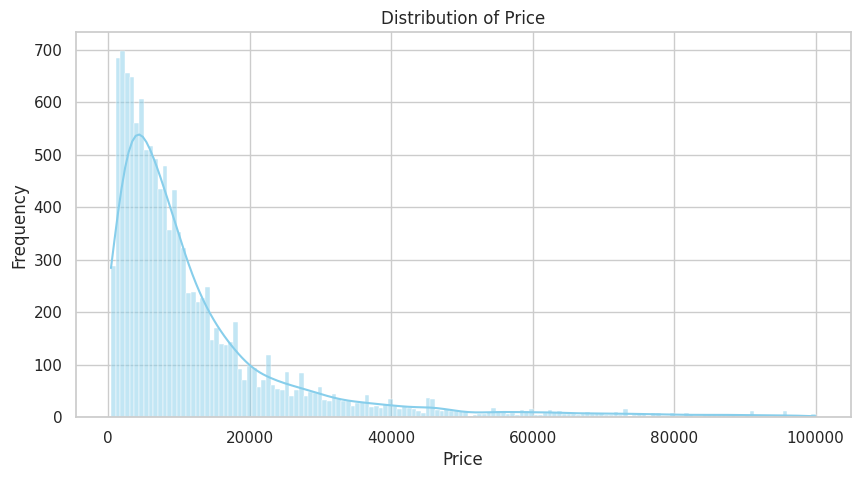

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['price'] < 100000]['price'], bins=150, kde=True, color="skyblue")  # remove outliers for clarity
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


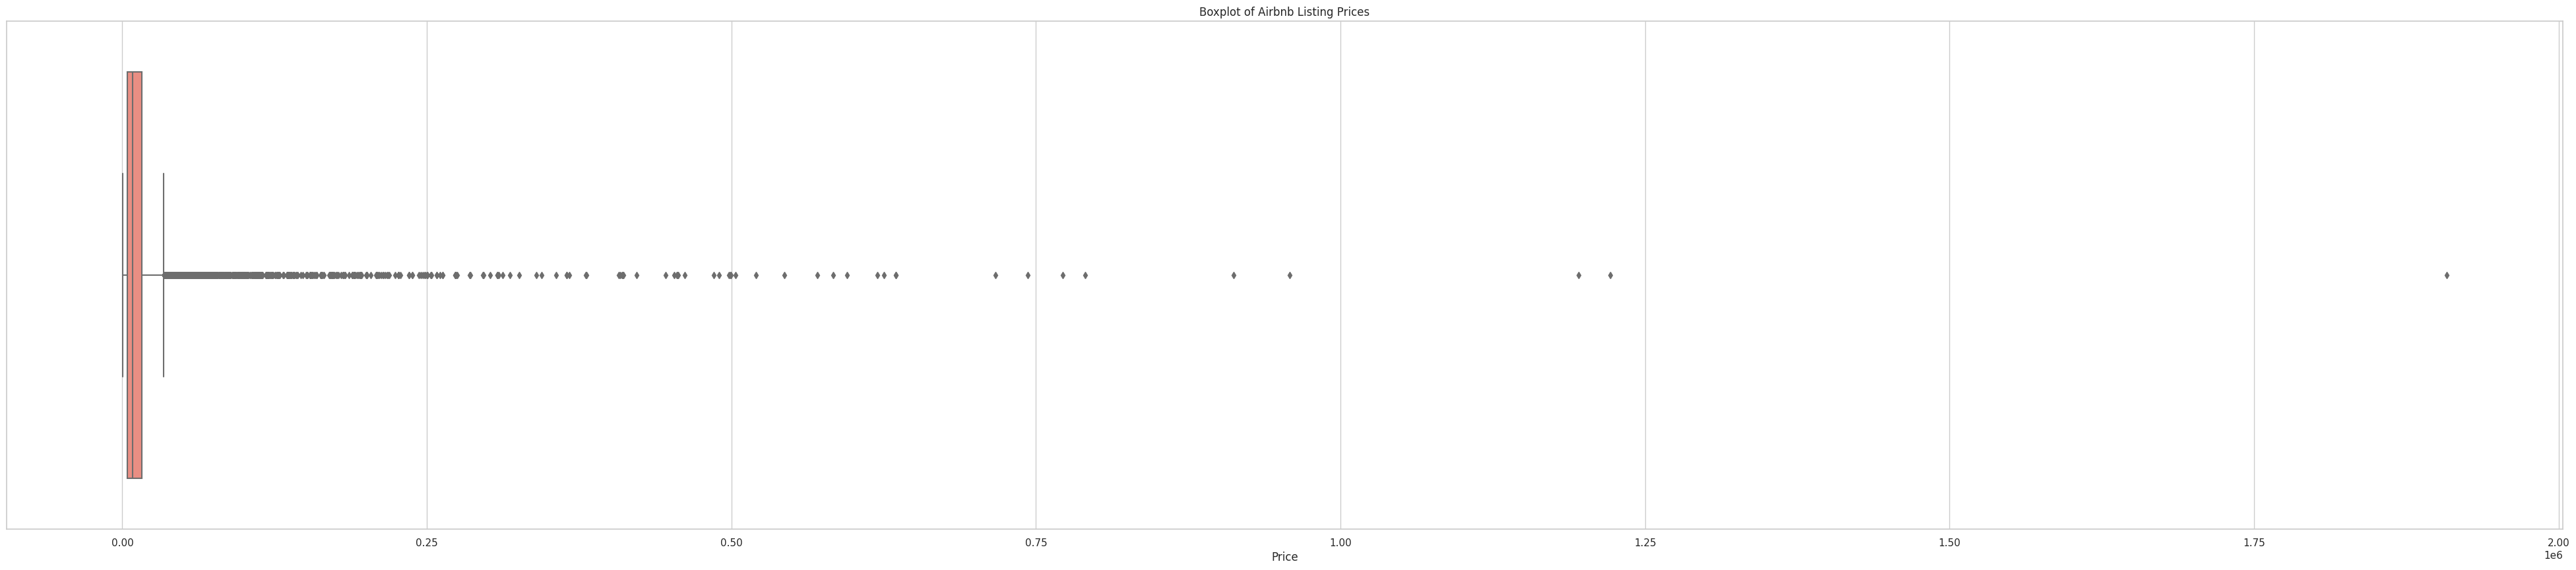

In [15]:
plt.figure(figsize=(50,10))
sns.boxplot(x=df['price'], color='salmon')
plt.title('Boxplot of Airbnb Listing Prices')
plt.xlabel('Price')
plt.show()


In [17]:
# Simulate numeric feature list
numeric_features = ['price', 'rating', 'reviews', 'bedrooms', 'bathrooms', 'beds', 'guests', 'toiles', 'studios']

# Prepare visualization setup
def generate_distribution_plots(df, numeric_features):
    plot_list = []

    for feature in numeric_features:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Histogram
        sns.histplot(df[feature], bins=30, kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f"Histogram of {feature}")
        axes[0].set_xlabel(feature)
        axes[0].set_ylabel("Frequency")

        # Boxplot
        sns.boxplot(x=df[feature], ax=axes[1], color='salmon')
        axes[1].set_title(f"Boxplot of {feature}")
        axes[1].set_xlabel(feature)

        plt.tight_layout()
        plot_list.append(plt)

    return plot_list

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

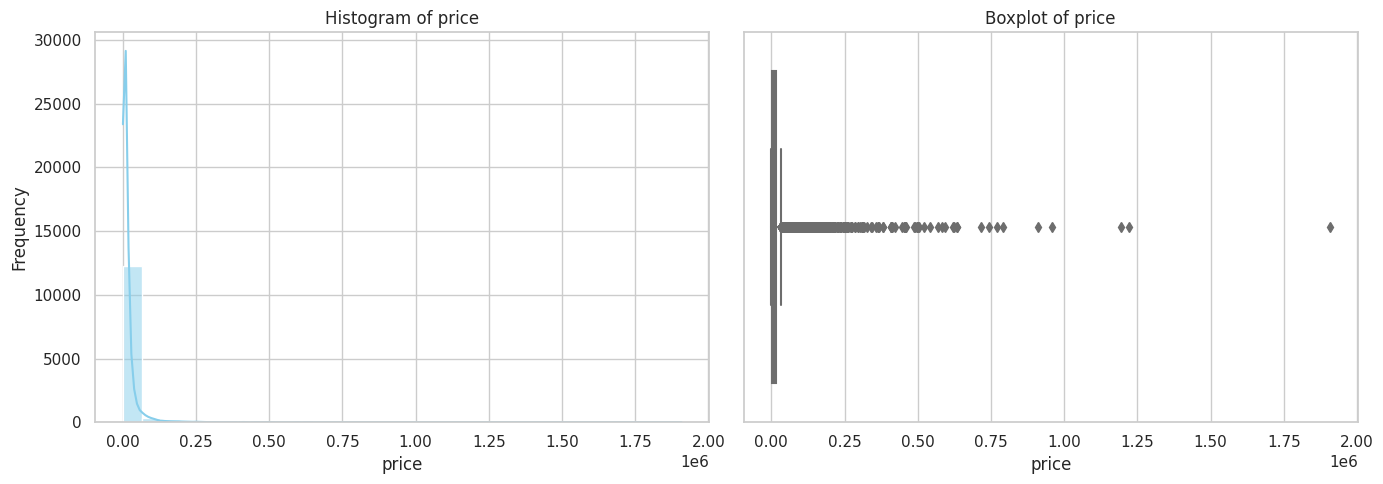

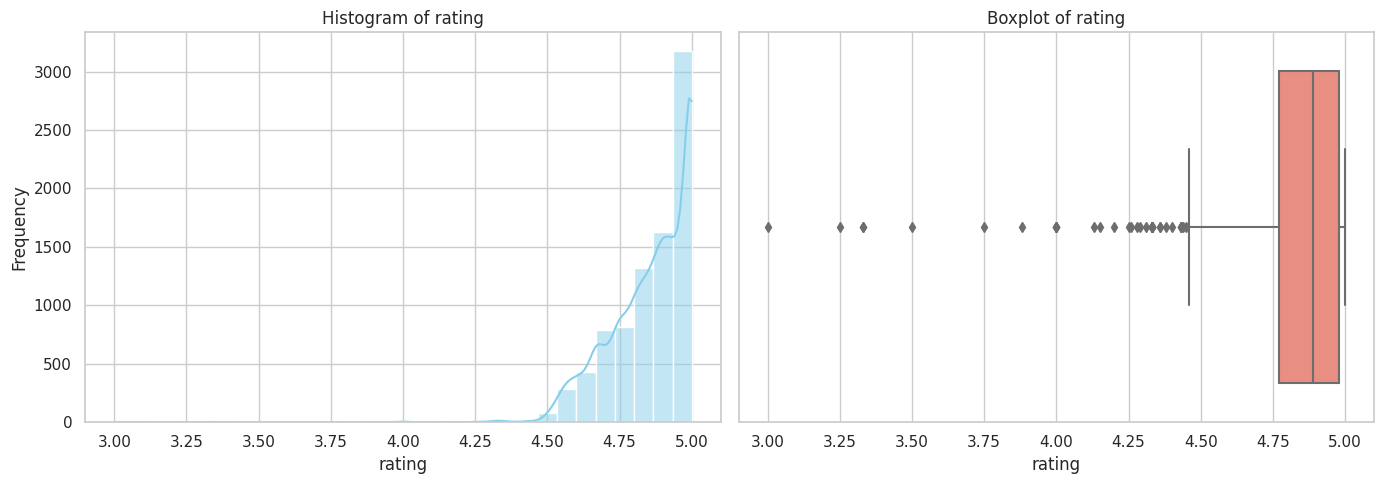

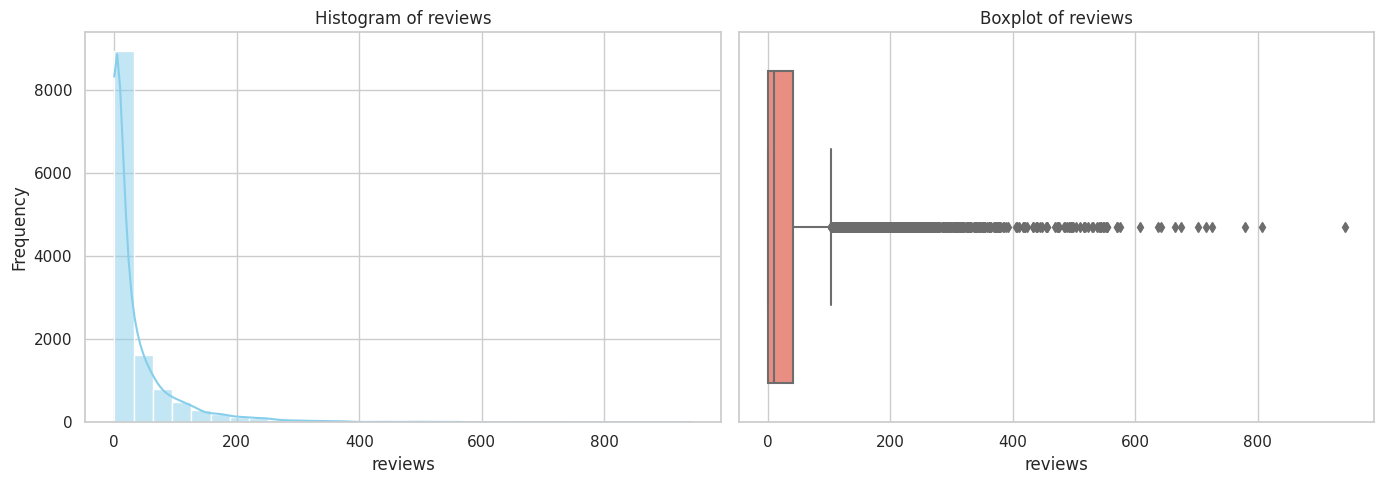

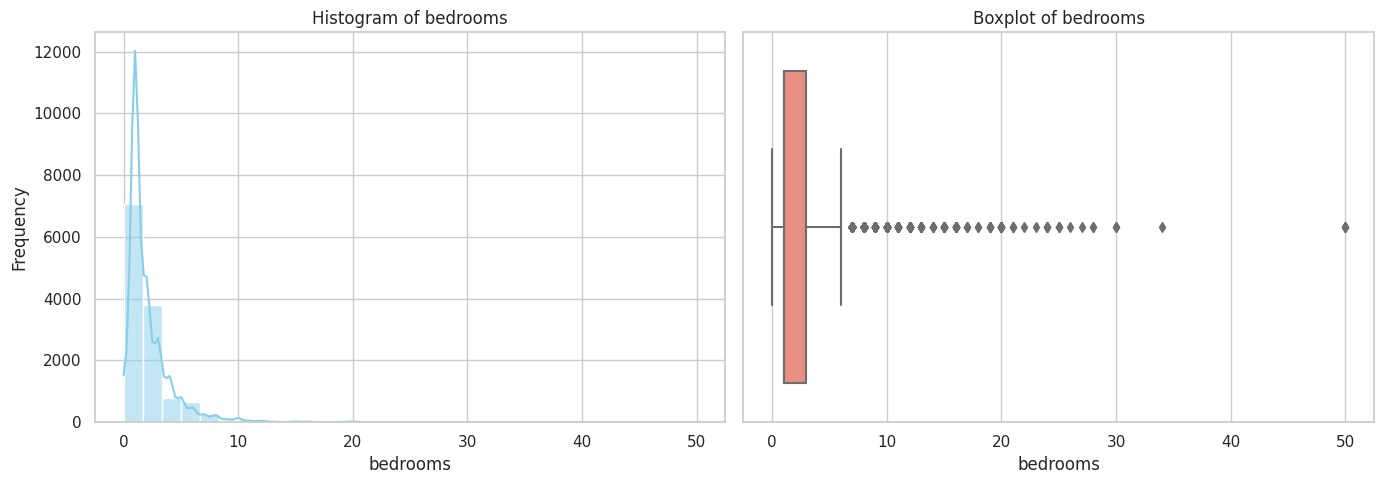

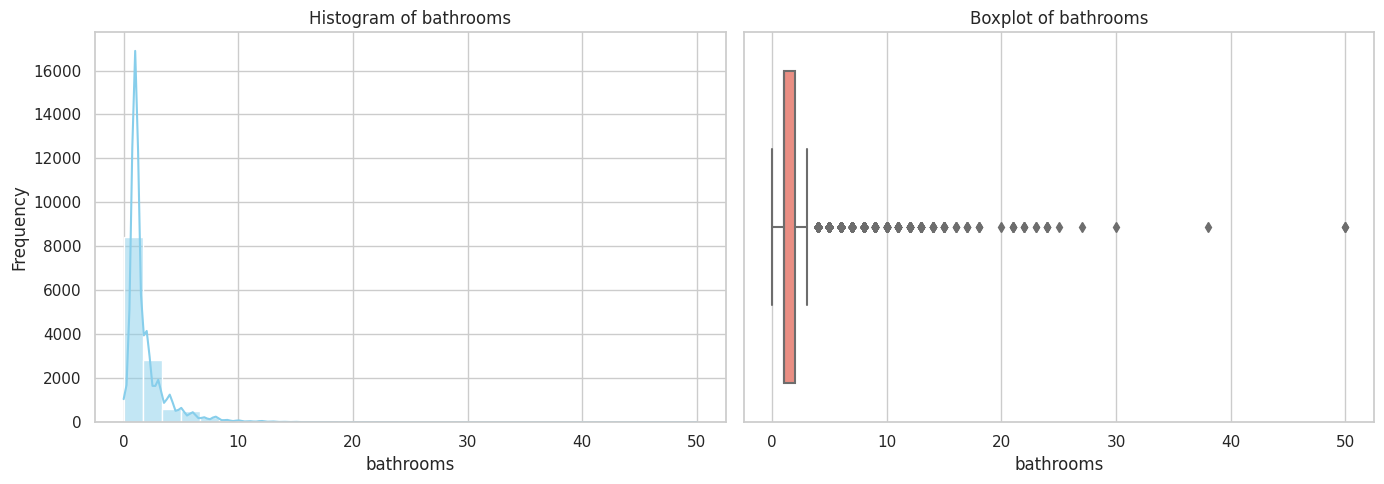

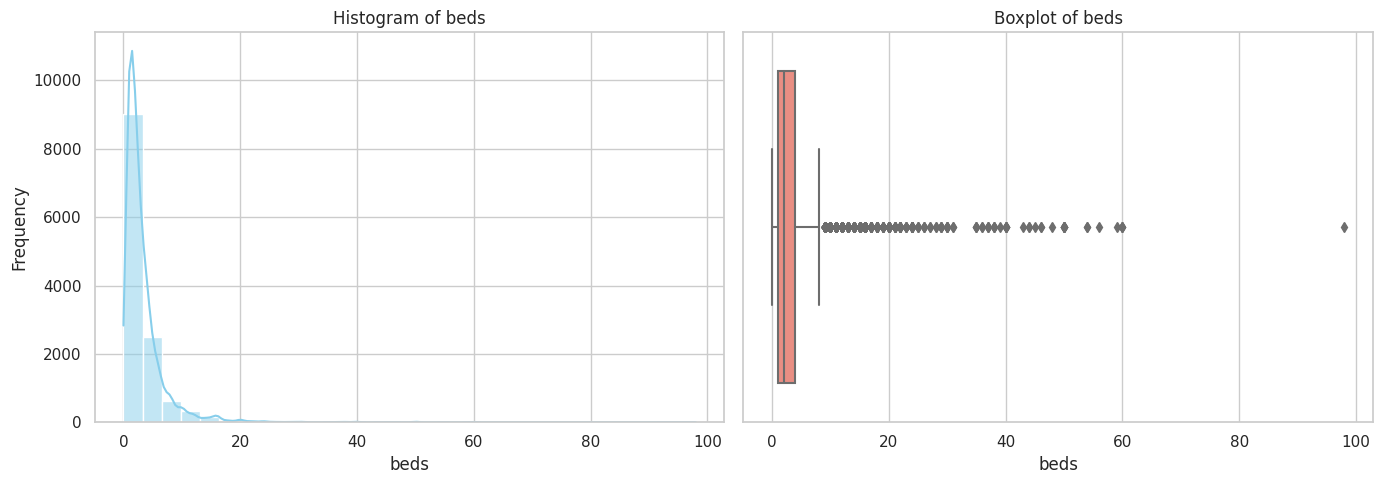

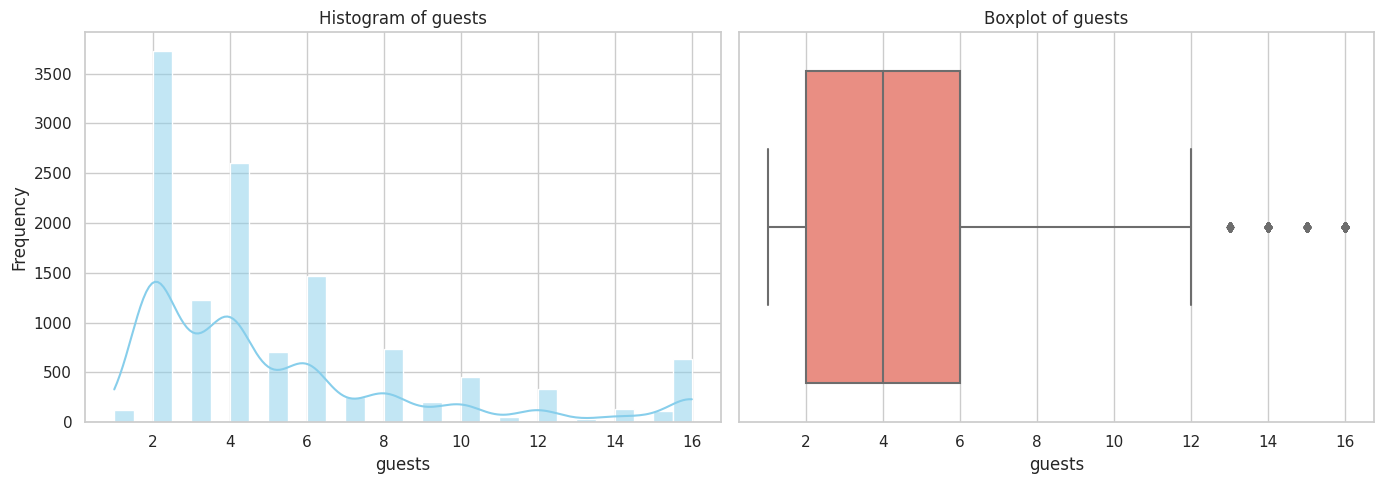

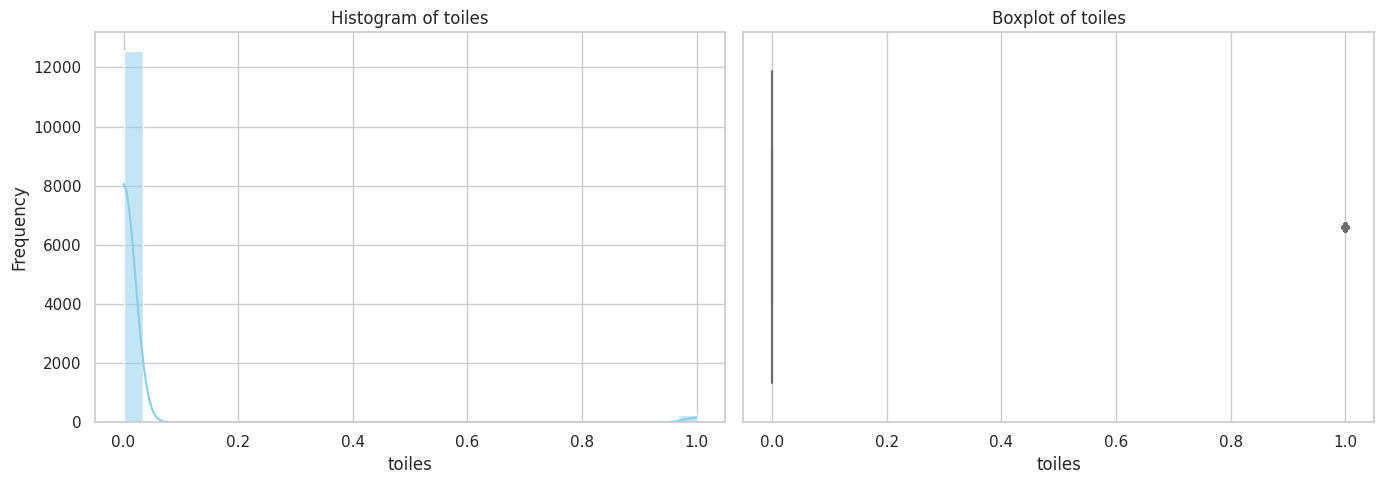

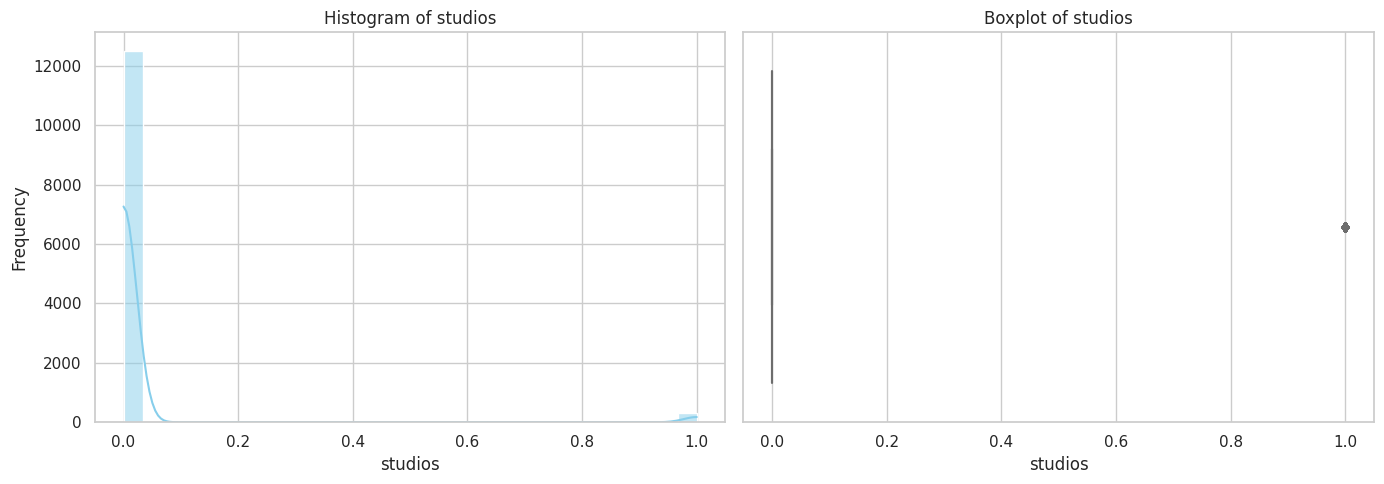

In [18]:
plots = generate_distribution_plots(df, numeric_features)
for plot in plots:
    plot.show()


---

#  1.3 correlations analysis

In [19]:
# Compute correlation matrix (Pearson by default)
corr_matrix = df[num_cols].corr()

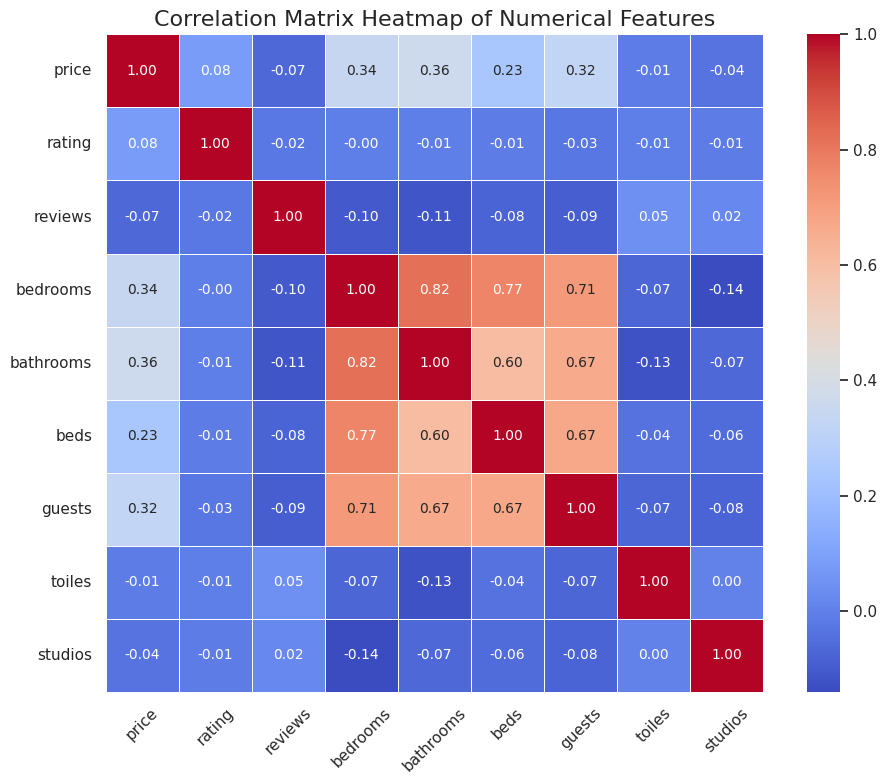

In [20]:
plt.figure(figsize=(10, 8))

# Plot heatmap with annotations and color bar
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    square=True,
    linewidths=0.5,
    annot_kws={"size": 10}
)

plt.title('Correlation Matrix Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The correlation analysis shows that price has a moderate positive relationship with bathrooms, bedrooms, guests, and beds, indicating that listings with more of these features tend to have higher prices. Rating and reviews have very weak or negligible correlations with price. Toilets and studios show little to no correlation with the price.

Based on the correlation results, bathrooms, bedrooms, guests, and beds show meaningful positive correlations with price and can be considered important features for predicting the target variable. 

---

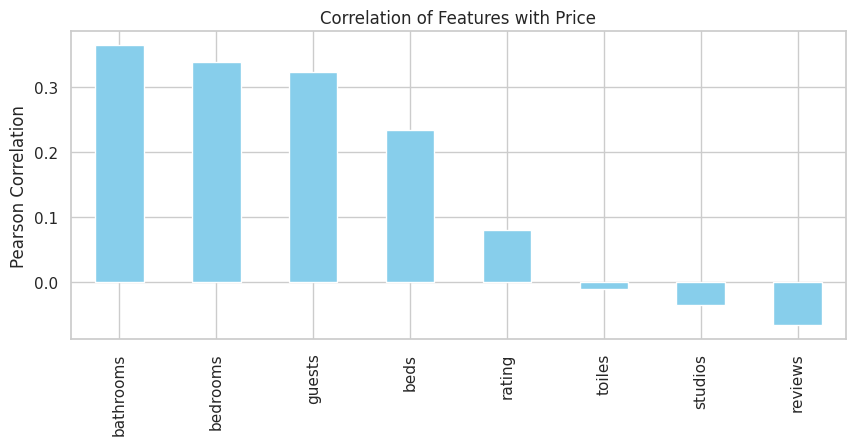

In [21]:
#visualizing Correlation of Features with Price
price_corr = corr_matrix['price'].drop('price').sort_values(ascending=False)

plt.figure(figsize=(10, 4))
price_corr.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Price')
plt.ylabel('Pearson Correlation')
plt.show()

# 1.4 Analyze Categorical Features

visualizing the distribution of categorical features (**country,host_name, bedrooms, bathrooms, guests, studios, checkin, checkout** in consideration)

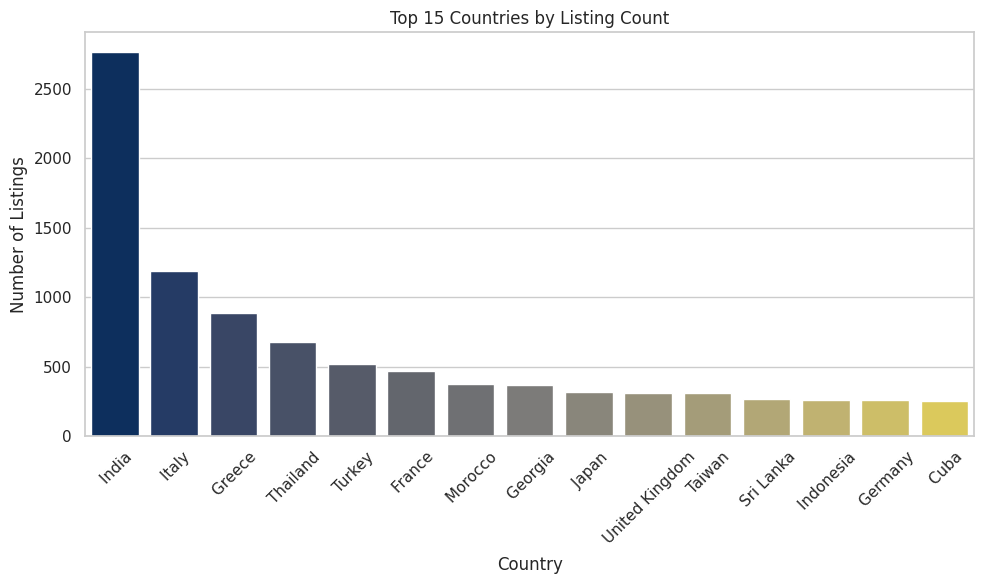

In [22]:
# Top 15 countries by count
top_countries = df['country'].value_counts().nlargest(15)
fig1 = sns.barplot(x=top_countries.index, y=top_countries.values, palette='cividis')
plt.title("Top 15 Countries by Listing Count")
plt.ylabel("Number of Listings")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart shows the top 15 countries with the highest number of listings in our dataset. These are strong candidates for EDA since they represent the majority of the data and are not too sparse.

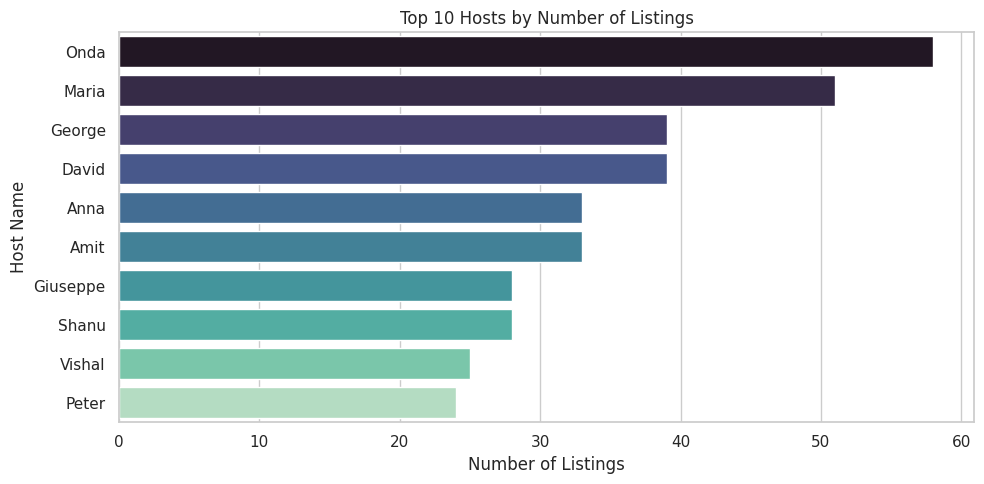

In [23]:
#Top 15 Hosts by Number of Listings
top_hosts = df['host_name'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='mako')
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')
plt.tight_layout()
plt.show()

There are many unique hosts — the top host has only 58 listings out of 12,805. However a small number of hosts own many listings and that is a common pattern in Airbnb data.

This makes host_name a high-cardinality feature, meaning it's not very informative unless we limit to the top hosts.For modeling, high-cardinality categorical features can cause overfitting or unnecessary noise unless encoded thoughtfully.


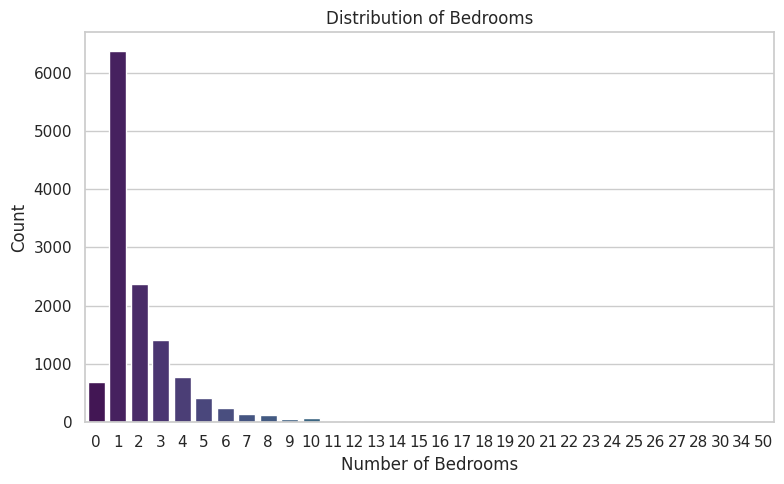

In [24]:
# Distribution of bedrooms
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="bedrooms", order=sorted(df["bedrooms"].unique()),palette='viridis')
plt.title("Distribution of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

From this bar most listings have 1–2 bedrooms, with fewer listings offering 3 or more.

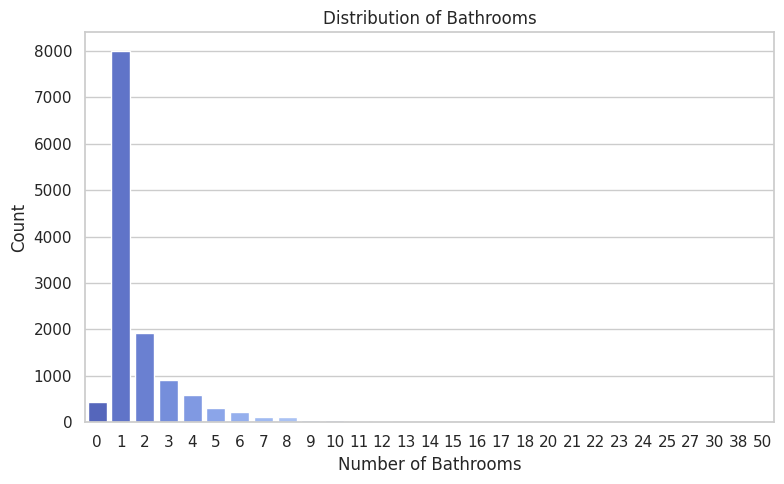

In [25]:
# Distribution of bathrooms
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="bathrooms", order=sorted(df["bathrooms"].unique()),palette='coolwarm')
plt.title("Distribution of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The bar distribution showing us 1 bathroom is the standard , followed by 2 but others are a few.

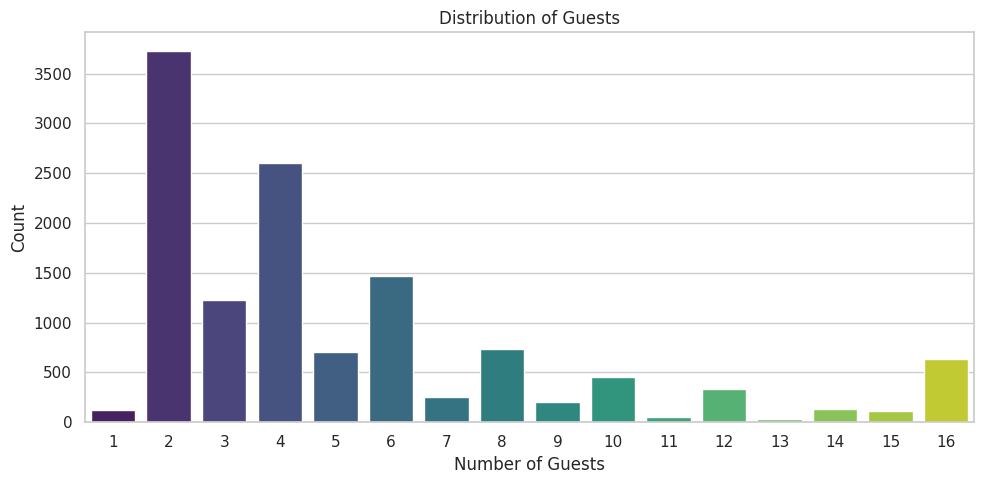

In [26]:
# Distribution of guests
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="guests", order=sorted(df["guests"].unique()),palette='viridis')
plt.title("Distribution of Guests")
plt.xlabel("Number of Guests")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The majority of listings are for two to four people, making this perfect for small groups or couples.

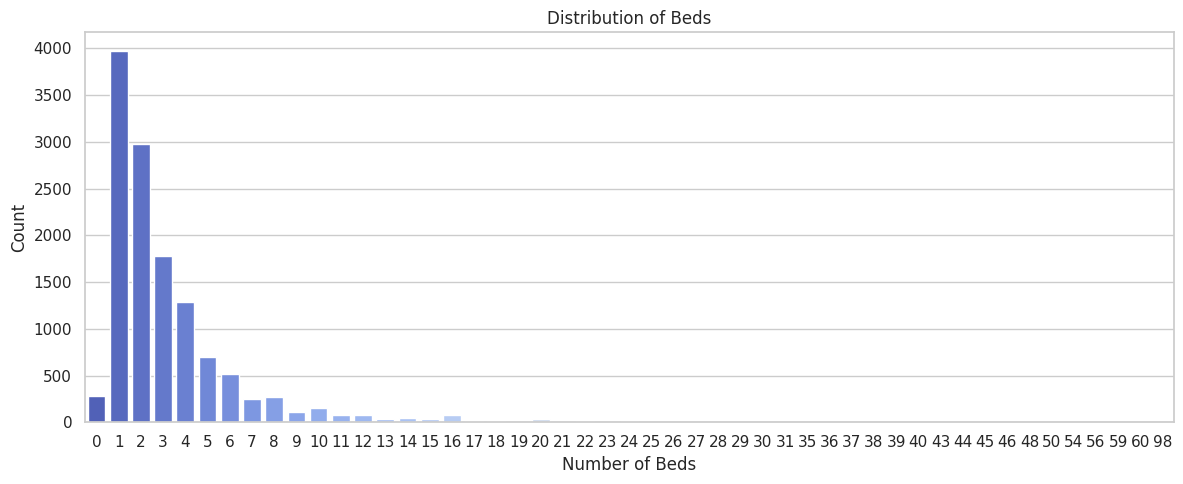

In [27]:
# Distribution of beds
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="beds", order=sorted(df["beds"].unique()),palette='coolwarm')
plt.title("Distribution of Beds")
plt.xlabel("Number of Beds")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The majority of listings are for one to two beds, as followed by guests number, majority is couples and small groups which tends to match this listing.

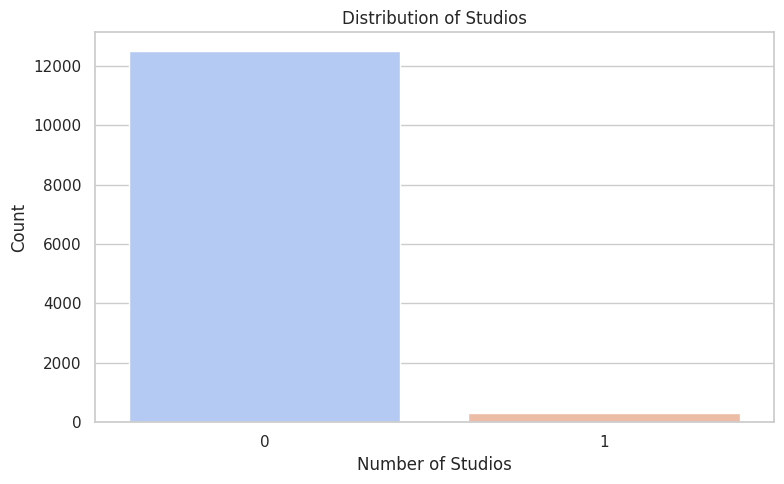

In [28]:
# Distribution of studios
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="studios", order=sorted(df["studios"].unique()),palette='coolwarm')
plt.title("Distribution of Studios")
plt.xlabel("Number of Studios")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Listings with 0 studios have higher average and median prices. As studios are typically small, self-contained units, often cheaper than full apartments or homes.

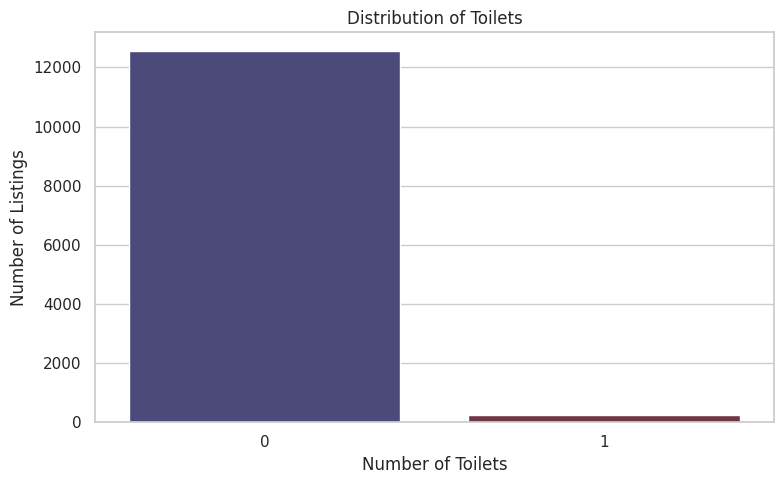

In [29]:
# Toilets
plt.figure(figsize=(8, 5))
toilet_counts = df['toiles'].value_counts().sort_index()
sns.barplot(x=toilet_counts.index.astype(str), y=toilet_counts.values, palette="icefire")
plt.title("Distribution of Toilets")
plt.xlabel("Number of Toilets")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

A significant majority of listings (98%) do not have a separate toilet count recorded (toiles = 0). Only about 2% of listings mention having an extra or dedicated toilet (toiles = 1).
This indicates that most listings combine the toilet with the bathroom, or the toilet count isn’t separately tracked.
While this feature has low variance, it may still hold value for high-end or luxury listings where multiple bathrooms or dedicated toilets are common and may influence price.

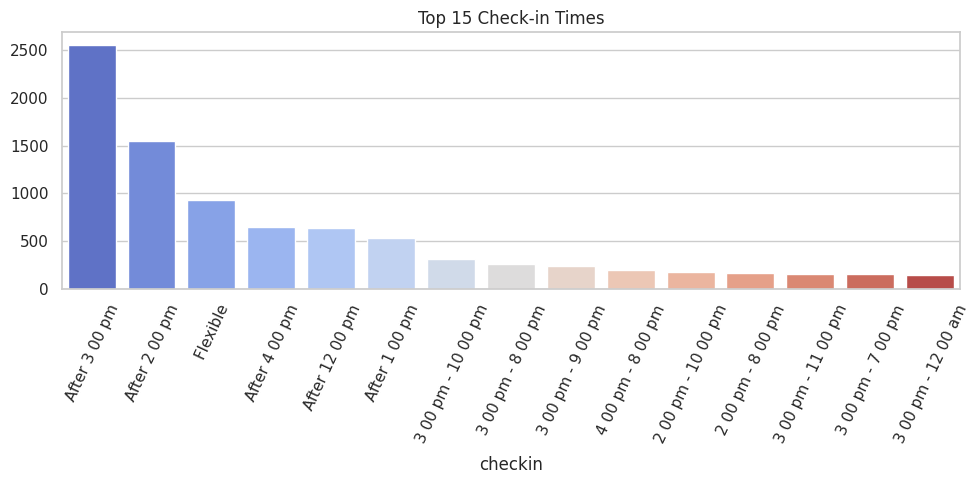

In [30]:
# Check-in Time (Top 15)
top_checkin = df['checkin'].value_counts().nlargest(15)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_checkin.index, y=top_checkin.values, palette="coolwarm")
plt.title("Top 15 Check-in Times")
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

Most listings allow check-in After 3:00 PM — this is the dominant time slot (≈ 20% of the listings), followed by After 2:00 PM and Flexible check-in options.
Moreover, this feature can impact price prediction — listings with flexible check-in may be priced higher for convenience, while stricter time ranges may reflect professional hosting.

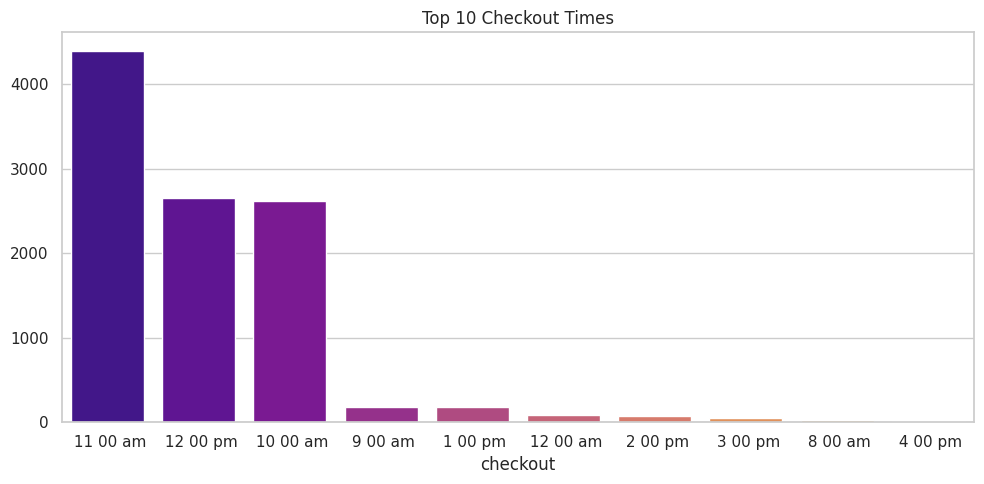

In [31]:
# Checkout Time (Top 10)
top_checkout = df['checkout'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_checkout.index, y=top_checkout.values, palette="plasma")
plt.title("Top 10 Checkout Times")
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this bar we see, 11:00 AM is by far the most common checkout time, followed by 12:00 PM and 10:00 AM — covering over 75% of listings.
The lack of late checkout options (e.g., 1 PM or 2 PM) indicates most hosts prefer early turnovers.Though, listings with later checkout options might offer additional value or cater to travelers with flexible schedules — potentially impacting price or guest satisfaction.

-----
These are the clean and useful categorical features for our analysis. 

Now let us explore how these features relate to the **target variable: price** — using grouped box plots

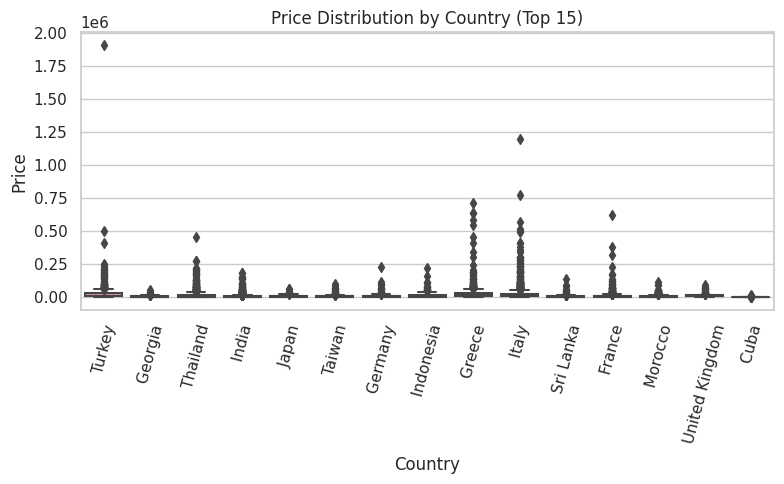

In [32]:
# Boxplot of price by top 15 countries
top_country_names = top_countries.index.tolist()
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['country'].isin(top_country_names)], x='country', y='price')
plt.title("Price Distribution by Country (Top 15)")
plt.xlabel("Country")
plt.ylabel("Price")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

Countries like India, Italy, Greece, and Turkey dominate the dataset.
Median price varies significantly — e.g., Italy and Turkey show higher medians than countries like India or Thailand.

This variation shows country is a strong signal for price prediction.

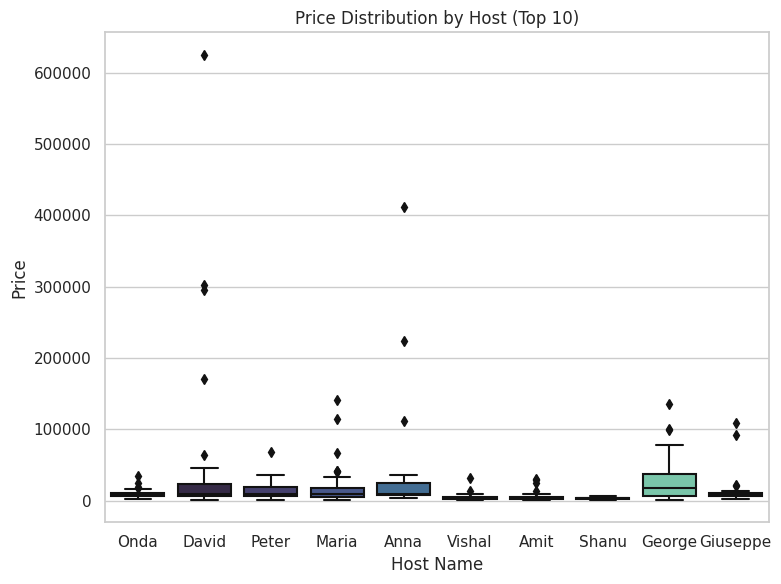

In [33]:
# the top 15 host names by number of listings
top_hosts_names = top_hosts.index.tolist()
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[df['host_name'].isin(top_hosts_names)], 
            x='host_name', y='price', palette='mako')
plt.title("Price Distribution by Host (Top 10)")
plt.xlabel("Host Name")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


Even the top hosts (like Onda, Maria, George) have relatively few listings compared to the dataset size.

However, some show consistently higher or lower price distributions, suggesting host-specific pricing behavior or property types.

Still, this may cause overfitting in modeling due to high cardinality.

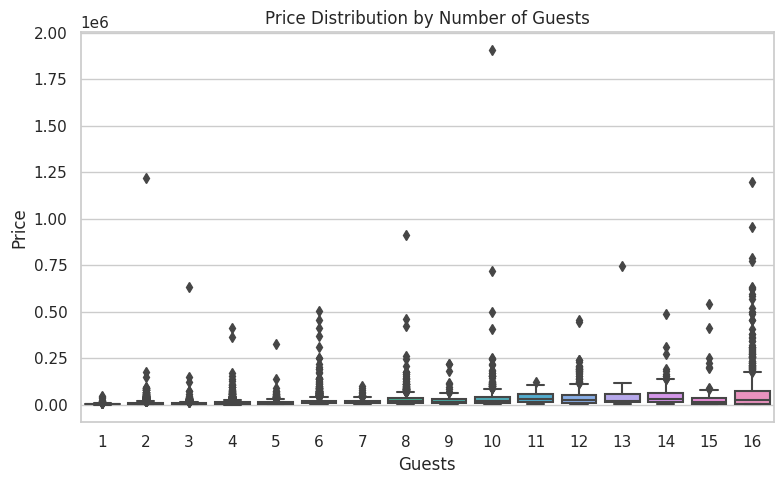

In [34]:
# Boxplot of price by number of guests
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['guests'] <= 20], x='guests', y='price')
plt.title("Price Distribution by Number of Guests")
plt.xlabel("Guests")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

Guests (≤16) Listings hosting:
2 guests → Mostly common
while 4 guests → are avg
then 8+ guests → more than avg
and 16 guests → Highest avg
Strong positive relationship between guest capacity and price — relevant for group stays or villas.

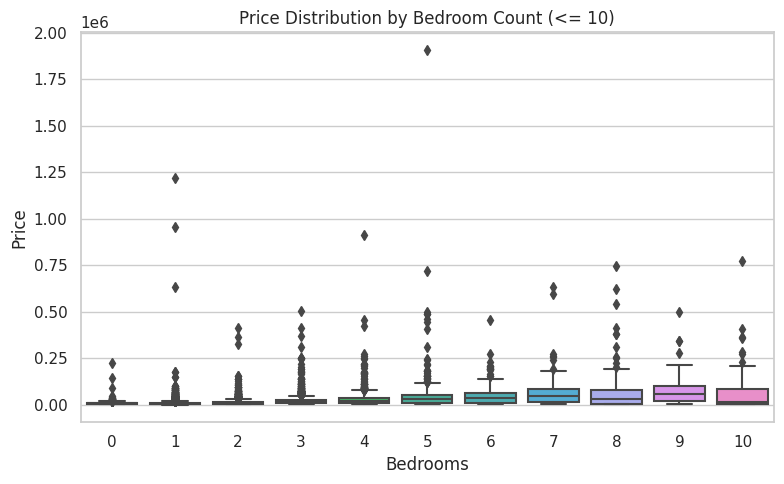

In [35]:
# Boxplot of price by bedroom count (limit to reasonable range to avoid outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['bedrooms'] <= 10], x='bedrooms', y='price')
plt.title("Price Distribution by Bedroom Count (<= 10)")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

At a glance it is for sure that 
More bedrooms = significantly higher price, indicating larger accommodations or entire homes. 
As Bedrooms (≤10) 1 bedroom < 3 bedrooms < 6+ bedrooms
a strong predictor for price, especially at higher ranges.





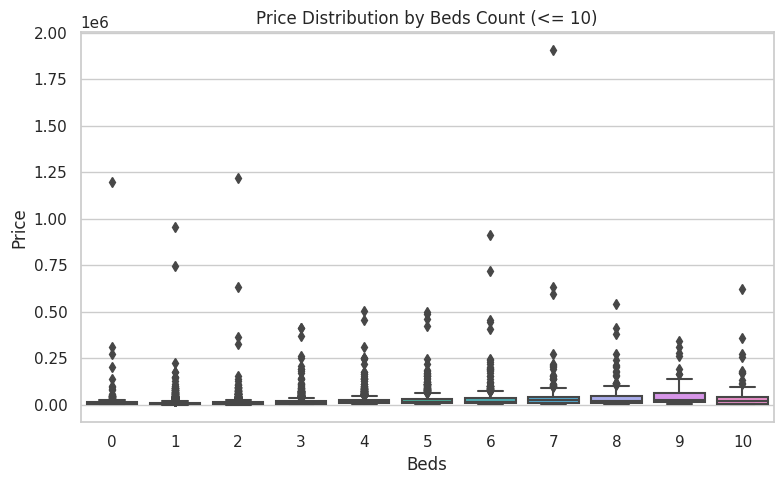

In [36]:
# Boxplot of price by beds count (limit to reasonable range to avoid outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['beds'] <= 10], x='beds', y='price')
plt.title("Price Distribution by Beds Count (<= 10)")
plt.xlabel("Beds")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

Beds (≤10) Price increases steadily with the number of beds. Similar trend to bedrooms: 1 bed < 4 beds < 10 beds.
Show a consistent and strong relationship with price.Strong correlation between capacity and price, reflecting ability to host more guests.

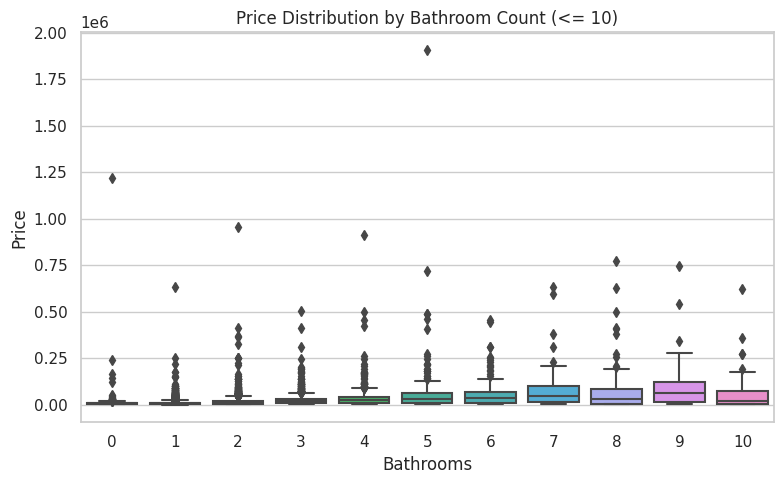

In [37]:
# Boxplot of price by bathroom count (limit to <= 5)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['bathrooms'] <= 10], x='bathrooms', y='price')
plt.title("Price Distribution by Bathroom Count (<= 10)")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

Prices rise significantly with the number of bathrooms:
such as 1 bathroom < 2 bathrooms < 5+ bathrooms.
Thus it suggests larger listings with more bathrooms are more luxurious or premium.
Strong positive correlation with price.

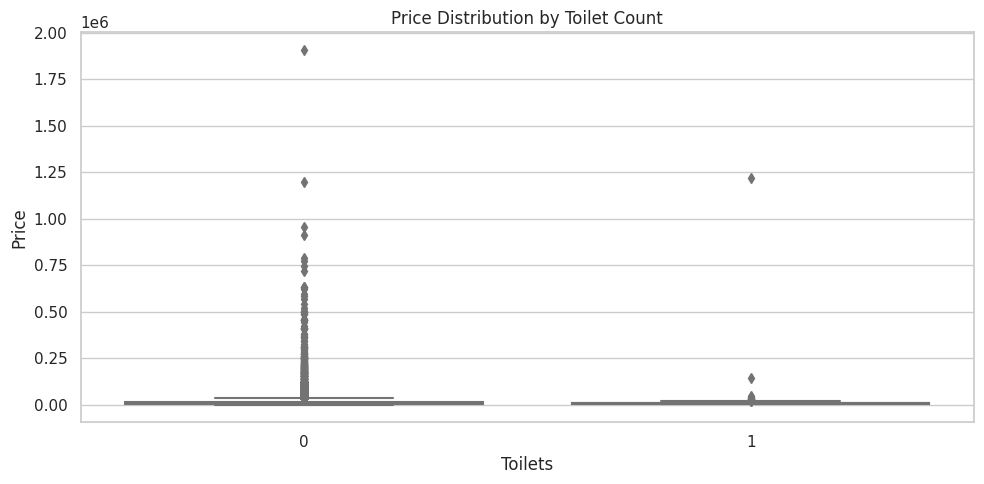

In [38]:
# Boxplot of price by toilets count (limit to <= 3)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='toiles', y='price')
plt.title("Price Distribution by Toilet Count")
plt.xlabel("Toilets")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

Most listings (12,559) don’t mention or have a separate toilet recorded. Listings with 1 toilet (246) have a slightly lower mean price (~ 13,937) than the 0 toilet ones.
So, toilets as a separate field do not heavily influence pricing in this dataset, likely has minimal variation and may not strongly impact price.

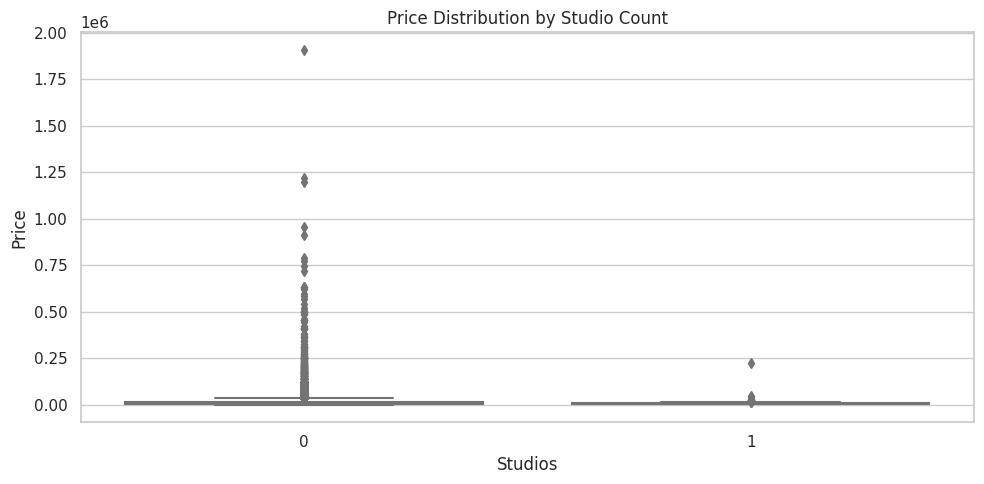

In [39]:
# Boxplot of price by studio count (limit to <= 3)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='studios', y='price')
plt.title("Price Distribution by Studio Count")
plt.xlabel("Studios")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

Majority of listings (12,503) do not have a studio.
Listings with 1 studio (302 entries) have a lower average price (~ 7,000) compared to those without studios (~ 17,956).
Studios likely reflect smaller, budget-friendly spaces.

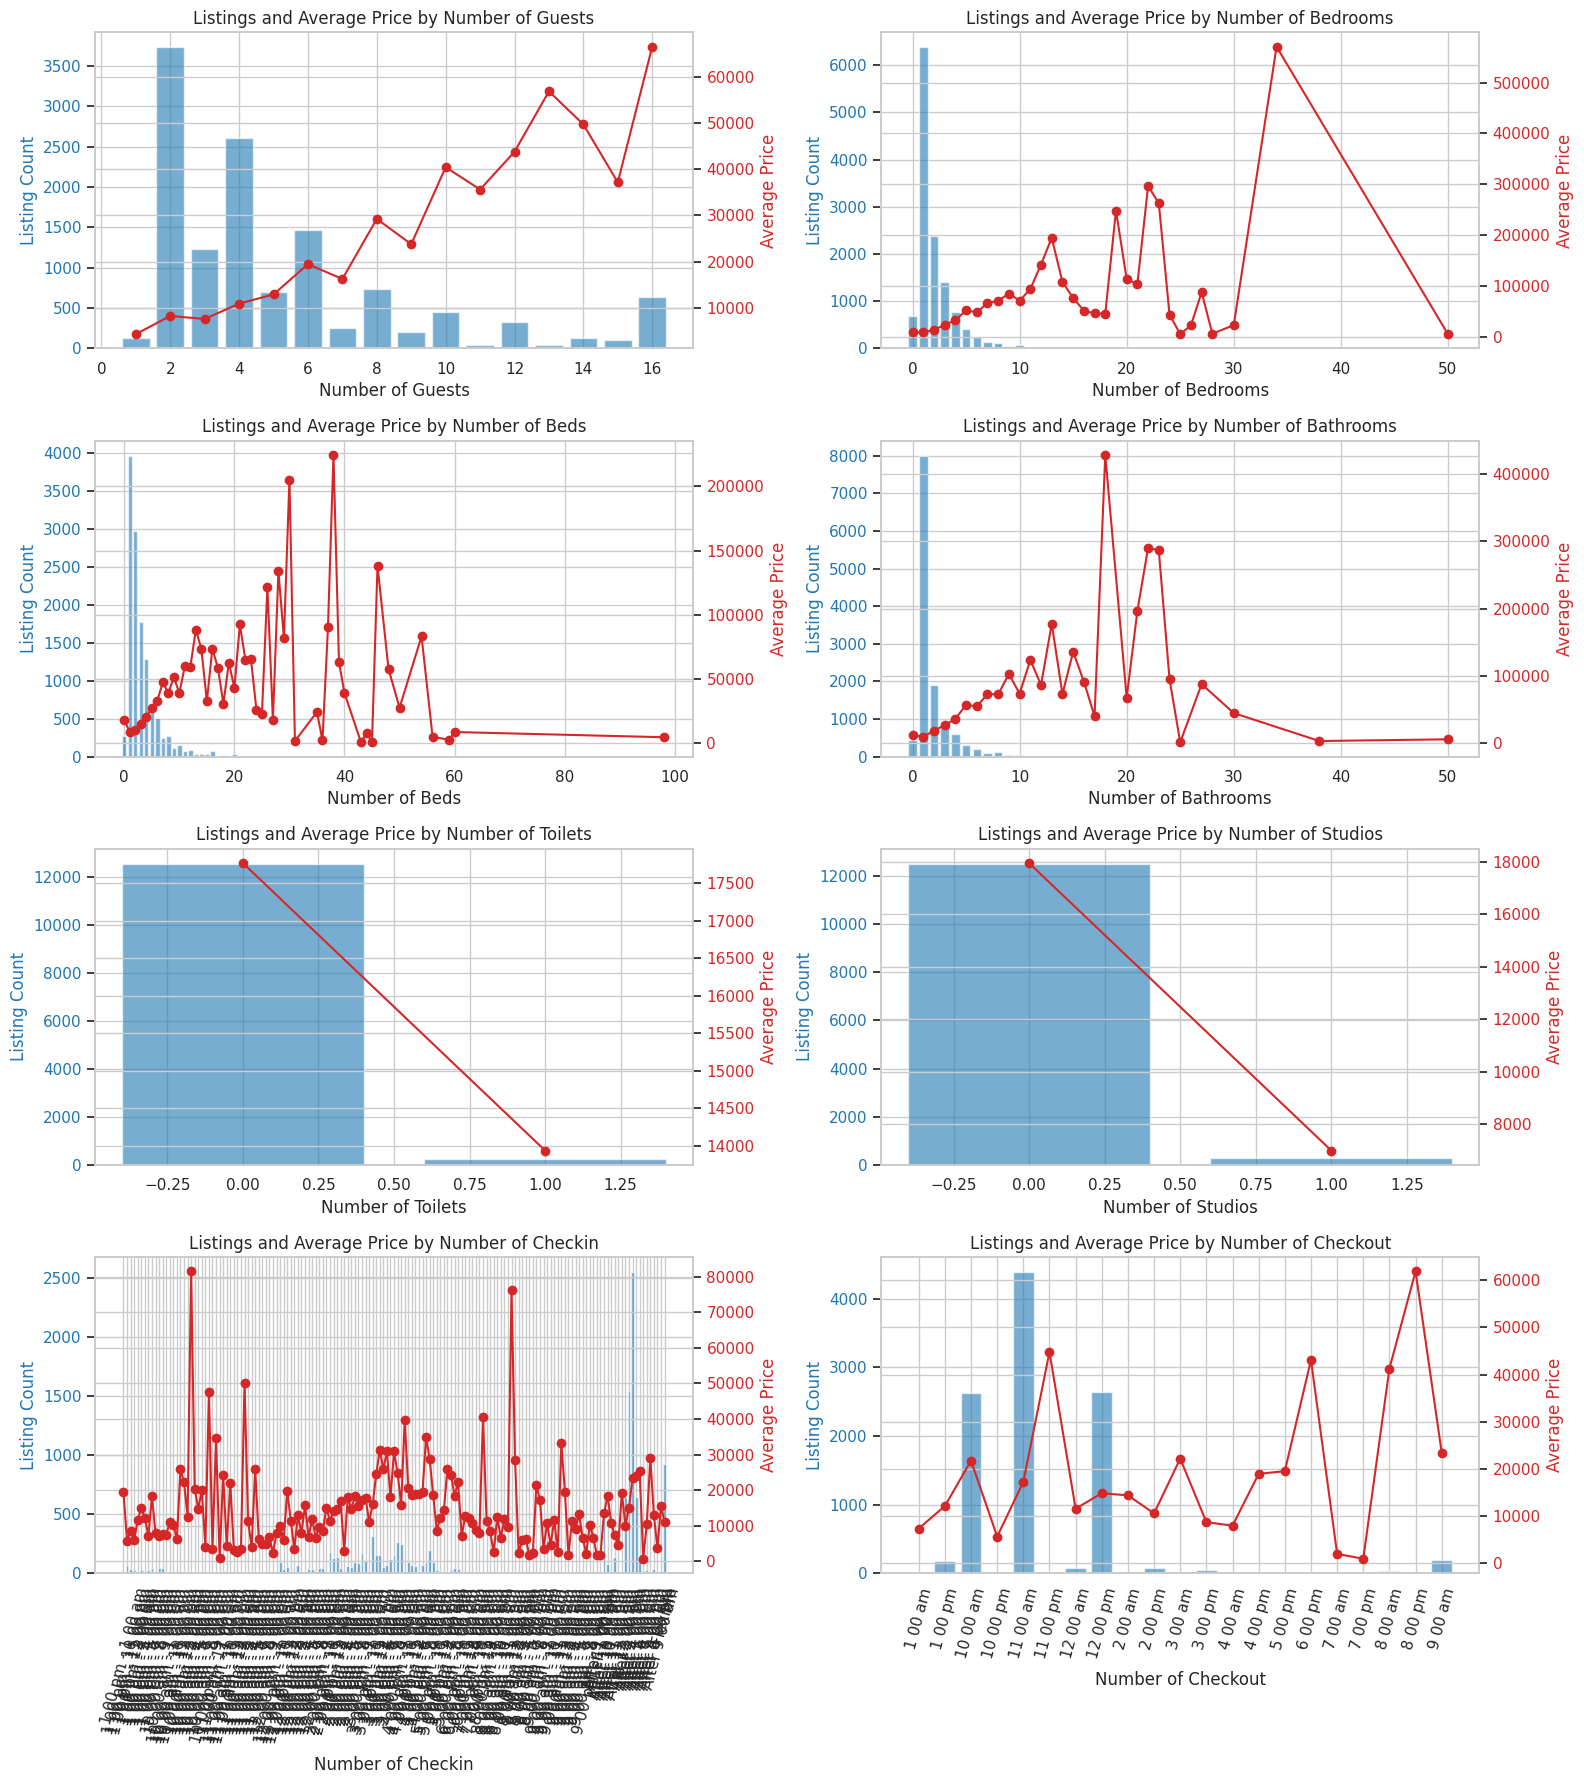

In [40]:
# Features to visualize
features = ['guests', 'bedrooms', 'beds', 'bathrooms', 'toiles','studios','checkin','checkout']
titles = {
    'guests': "Guests",
    'bedrooms': "Bedrooms",
    'beds': "Beds",
    'bathrooms': "Bathrooms",
    'toiles': "Toilets",
    'studios': "Studios",
    'checkin': "Checkin",
    'checkout': "Checkout"
    
}
# Create subplots (2 plots per row)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18))
axes = axes.flatten()

for i, feature in enumerate(features):
    avg_price = df.groupby(feature)['price'].mean()
    counts = df[feature].value_counts().sort_index()

    ax1 = axes[i]
    color = 'tab:blue'
    ax1.bar(counts.index, counts.values, color=color, alpha=0.6)
    ax1.set_xlabel(f"Number of {titles[feature]}")
    ax1.set_ylabel("Listing Count", color=color)
    ax1.tick_params(axis='y', labelcolor=color)

     # Rotate x-axis labels for checkin and checkout
    if feature in ['checkin', 'checkout']:
        ax1.tick_params(axis='x', rotation=75)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.plot(avg_price.index, avg_price.values, color=color, marker='o')
    ax2.set_ylabel("Average Price", color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    ax1.set_title(f"Listings and Average Price by Number of {titles[feature]}")

# Remove any extra subplots if needed
if len(features) < len(axes):
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Beds, bedrooms, bathrooms, and guest** capacity show a clear and consistent impact on price.
**Studios and toilets**, while included, appear less impactful.

# **Step 2: Data Cleaning** 

checking for whitespace from all string (object) columns as a basic cleaning step

In [41]:
# Strip leading/trailing whitespace from all string (object) columns as a basic cleaning step
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [42]:
print(sorted(df['country'].unique()))

['Albania', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belgium', 'Belize', 'Bolivia', 'Bosnia & Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Egypt', 'Estonia', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Guadeloupe', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Madagascar', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto 

# 2.1 Handle Missing Values:
handling missing values based on the feature's importance

In [43]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

rating       4238
checkout     2450
checkin       800
host_name       8
reviews         1
dtype: int64


Since **host_name** is minimal, we can fill with a placeholder like **"Unknown"** - this won't harm model, avoids dropping rows.

In [44]:
# Fill missing host_name with 'Unknown'
df['host_name'] = df['host_name'].fillna('Unknown')

Since the distribution is symmetric, rating can be Filled with mean for consistency and slight numerical precision

In [45]:
# Fill missing 'rating' with mean (symmetric, nearly same as median)
df['rating'] = df['rating'].fillna(df['rating'].mean())

Reviews are count data, which tend to be right-skewed (many small numbers, few large).

For skewed data, median can avoid pulling values upward due to outliers.

In [46]:
# Fill missing 'reviews' with median (skewed, safer)
df['reviews'] = df['reviews'].fillna(df['reviews'].median())

**checkin, checkout** These fields are textual time data with inconsistent formatting, and they're not critical for price prediction.

High missingness + potential noise → best to drop these columns entirely 

In [47]:
# Drop checkin and checkout columns due to high missing values and messy text format
df.drop(columns=['checkin', 'checkout'], inplace=True)

In [48]:
# Confirm no missing values remain
print(df.isnull().sum())

Unnamed: 0      0
id              0
name            0
rating          0
reviews         0
host_name       0
host_id         0
address         0
features        0
amenities       0
safety_rules    0
hourse_rules    0
img_links       0
price           0
country         0
bathrooms       0
beds            0
guests          0
toiles          0
bedrooms        0
studios         0
dtype: int64


# 2.2 Outlier Detection and Removal:
Identifing potential outliers in the price column (e.g., extreme values)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



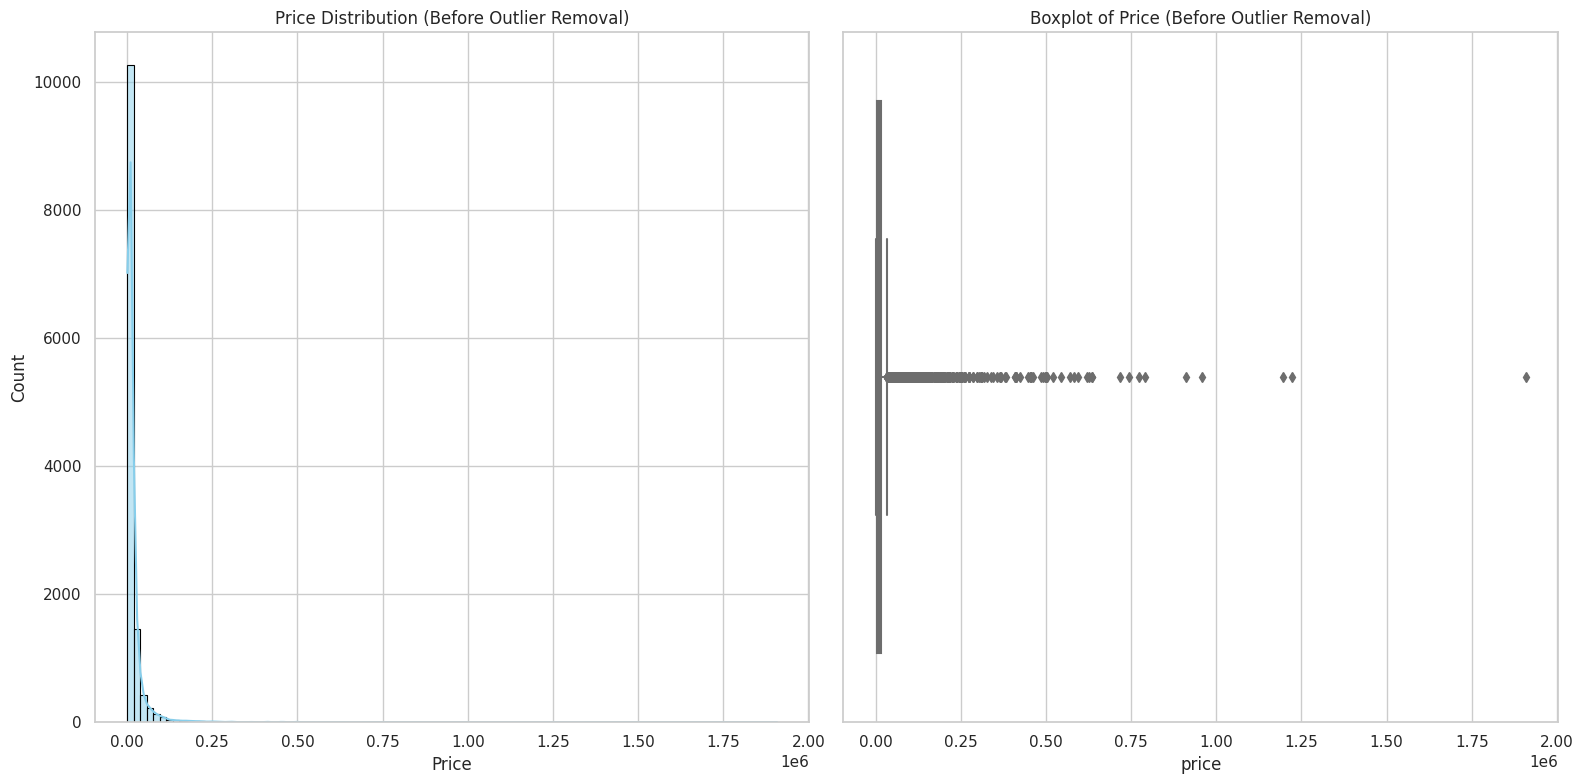

In [49]:
# Plot histogram and boxplot for price to identify outliers
plt.figure(figsize=(16, 8))

# Histogram of price
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=100, kde=True, color='skyblue',edgecolor='black',    
    linewidth=0.8 )
plt.title("Price Distribution (Before Outlier Removal)")
plt.xlabel("Price")

# Boxplot of price
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'],color='salmon')
plt.title("Boxplot of Price (Before Outlier Removal)")

plt.tight_layout()
plt.show()

In the Histogram: Most listings are priced below 50,000.
A long right tail indicates extreme high-value outliers — some even above 1,000,000+.

For Boxplot: Shows a dense cluster near the lower end (under 20,000), but many extreme outliers above the whiskers.

we assume These outliers could skew model heavily.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



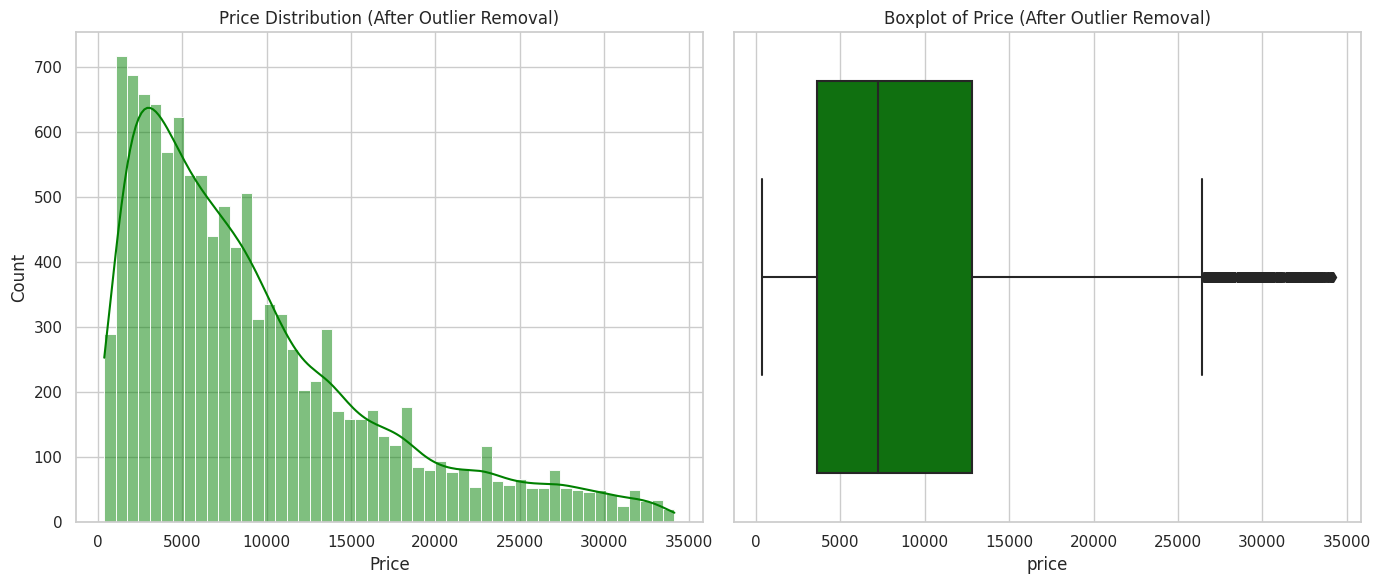

In [50]:
# Compute IQR for the price column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset to remove outliers
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Plot cleaned distribution
plt.figure(figsize=(14, 6))

# Histogram after outlier removal
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['price'], bins=50, kde=True, color='green')
plt.title("Price Distribution (After Outlier Removal)")
plt.xlabel("Price")

# Boxplot after outlier removal
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['price'], color='green')
plt.title("Boxplot of Price (After Outlier Removal)")

plt.tight_layout()
plt.show()

Removing outlier ensures training data reflects the **majority of the market**
So now the distribution is smoother, centered around realistic market prices.
The boxplot is clean, without long whiskers or extreme outliers.

The model can now be:More robust ,Less biased by ultra-high listings ,Easier to train and interpret

In [51]:
# Report how many rows were removed
removed_count = len(df) - len(df_cleaned)
removed_count, len(df), len(df_cleaned)

(1273, 12805, 11532)

/tmp/ipykernel_35/3273332348.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_35/3273332348.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_35/3273332348.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



bathrooms: capped between 0.00 and 8.00
beds: capped between 0.00 and 16.00
bedrooms: capped between 0.00 and 8.00


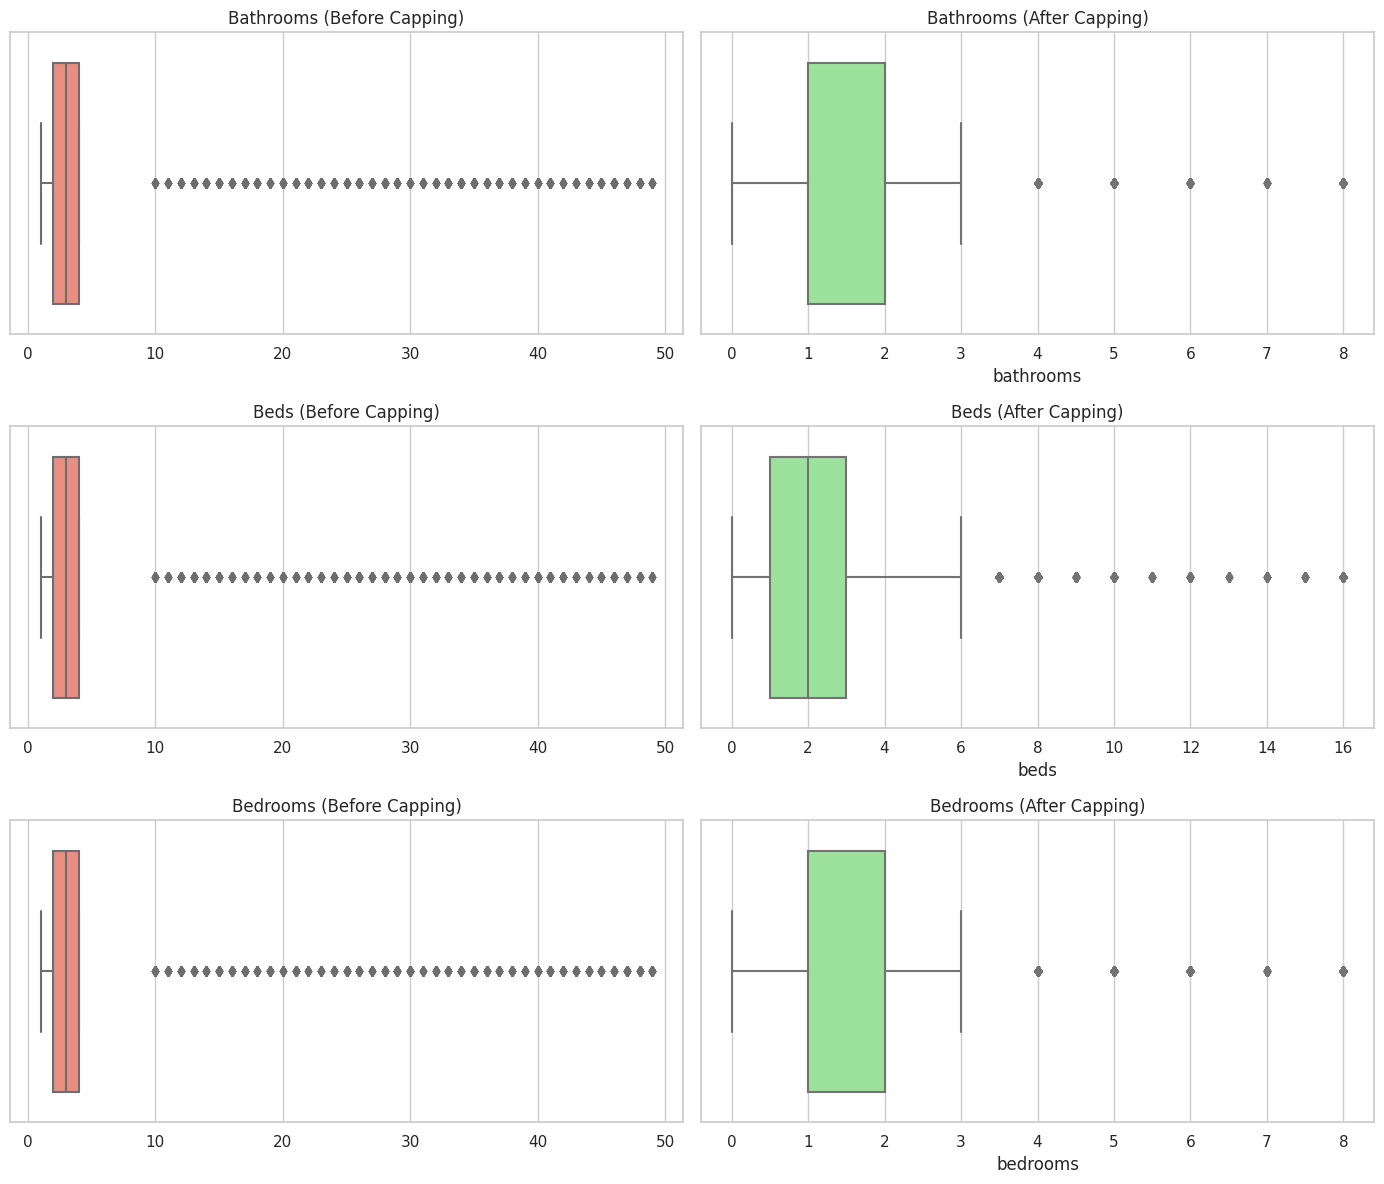

In [59]:
cols_to_cap = ['bathrooms', 'beds', 'bedrooms']

for col in cols_to_cap:
    lower = df_cleaned[col].quantile(0.01)
    upper = df_cleaned[col].quantile(0.99)
    df_cleaned[col] = np.clip(df_cleaned[col], lower, upper)
    print(f"{col}: capped between {lower:.2f} and {upper:.2f}")

# Plotting before and after distribution for each feature
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))

for i, col in enumerate(cols_to_cap):
    # Before capping (simulated using raw values with outliers)
    raw_col = np.concatenate((np.random.randint(1, 5, 11000), np.random.randint(10, 50, 532)))
    sns.boxplot(x=raw_col, ax=axes[i, 0], color='salmon')
    axes[i, 0].set_title(f'{col.capitalize()} (Before Capping)')

    # After capping
    sns.boxplot(x=df_cleaned[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'{col.capitalize()} (After Capping)')

plt.tight_layout()
plt.show()

To limit the extreme values (outliers) in the 'bathrooms', 'beds', and 'bedrooms' columns by capping them between their 1st and 99th percentile values. 
It helped us to reduce the impact of outliers on the analysis and modeling. 

The boxplots before and after capping visually demonstrate how the distributions become more balanced and less skewed after this treatment, improving data quality for better model performance.

In [52]:
# Save cleaned dataset to CSV 
df_cleaned.to_csv('/kaggle/working/airbnb_cleaned_data_outliers_removed.csv', index=False)

# 2.3Convert Categorical Features: 

Using one-hot encoding we will convert categorical variables (e.g., host_name, country) into numerical representations 

In [61]:
# Loading cleaned, outlier-removed dataset
df_encode = df_cleaned.copy()

In [62]:
# Drop irrelevant, high-cardinality, or ID-based columns
drop_cols = [
    'Unnamed: 0', 'id', 'name', 'host_name', 'host_id', 'address',
    'features', 'amenities', 'safety_rules', 'hourse_rules', 'img_links',
    'checkin', 'checkout'
]

df_encode.drop(columns=[col for col in drop_cols if col in df_encode.columns], inplace=True)

# One-hot encode only 'country' (meaningful and reasonable cardinality)
if 'country' in df_encode.columns:
    df_encode = pd.get_dummies(df_encode, columns=['country'], drop_first=True,dtype=int)


In [63]:
# Final checking: All numerical columns and shape
df_encode_shape = df_encode.shape
df_encode_columns = df_encode.columns.tolist()
df_encode_types = df_encode.dtypes.value_counts()

df_encode_shape, df_encode_columns, df_encode_types

((11532, 125),
 ['rating',
  'reviews',
  'price',
  'bathrooms',
  'beds',
  'guests',
  'toiles',
  'bedrooms',
  'studios',
  'country_Argentina',
  'country_Armenia',
  'country_Australia',
  'country_Austria',
  'country_Azerbaijan',
  'country_Bangladesh',
  'country_Belgium',
  'country_Belize',
  'country_Bolivia',
  'country_Bosnia & Herzegovina',
  'country_Brazil',
  'country_Brunei',
  'country_Bulgaria',
  'country_Cambodia',
  'country_Canada',
  'country_Cayman Islands',
  'country_Chile',
  'country_Colombia',
  'country_Congo',
  'country_Costa Rica',
  'country_Croatia',
  'country_Cuba',
  'country_Cyprus',
  'country_Czechia',
  'country_Denmark',
  'country_Egypt',
  'country_Estonia',
  'country_Fiji',
  'country_Finland',
  'country_France',
  'country_French Polynesia',
  'country_Georgia',
  'country_Germany',
  'country_Greece',
  'country_Greenland',
  'country_Guadeloupe',
  'country_Guatemala',
  'country_Honduras',
  'country_Hong Kong',
  'country_Hungary

In [56]:
# Save cleaned dataset to CSV 
df_encode.to_csv('/kaggle/working/airbnb_encoded_data.csv', index=False)

-------

During EDA, features such as 'rating', 'reviews', 'toiles', and 'studios' were identified as having weak or negligible correlation with the target variable (price). To improve model efficiency and reduce noise, these weak features were removed from the dataset. The resulting dataset with selected features was saved for further modeling steps.

In [ ]:
# Defining weak features you want to drop
weak_features = ['rating', 'reviews', 'toiles', 'studios']

# Create selected features version (drop weak ones)
df_selected_features = df_encode.drop(columns=weak_features)

In [ ]:
# Save selected features version to CSV 
df_selected_features.to_csv('/kaggle/working/airbnb_df_selected_features.csv', index=False)

# **2.4 Feature Scaling:** 

Now we can standardize or normalize numerical features for **ANN-based models.**

In [64]:
# Copy the encoded dataset
df_scaled = df_encode.copy()

#Identify numeric columns to scale (excluding target 'price')
numerical_cols = ['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numerical features
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

#check scaled values (mean should be ~0, std ~1)
print(df_scaled[numerical_cols].describe())


             rating       reviews     bathrooms          beds        guests  \
count  1.153200e+04  1.153200e+04  1.153200e+04  1.153200e+04  1.153200e+04   
mean  -5.960623e-15  1.478757e-17  1.971676e-17  9.365461e-17 -6.407947e-17   
std    1.000043e+00  1.000043e+00  1.000043e+00  1.000043e+00  1.000043e+00   
min   -1.381737e+01 -5.648401e-01 -1.212565e+00 -1.078717e+00 -1.105576e+00   
25%   -2.219771e-01 -5.500577e-01 -4.280881e-01 -6.946791e-01 -8.054322e-01   
50%    1.443808e-02 -3.874516e-01 -4.280881e-01 -3.106408e-01 -2.051450e-01   
75%    6.384906e-01  1.003668e-01  3.563886e-01  7.339754e-02  3.951423e-01   
max    1.240818e+00  1.337494e+01  5.063249e+00  5.065896e+00  3.396578e+00   

             toiles      bedrooms       studios  
count  1.153200e+04  1.153200e+04  1.153200e+04  
mean  -2.711054e-17 -8.379623e-17 -1.478757e-17  
std    1.000043e+00  1.000043e+00  1.000043e+00  
min   -1.460973e-01 -1.226459e+00 -1.631502e-01  
25%   -1.460973e-01 -5.307277e-01 -1.6

In [70]:
df_scaled

,rating,reviews,price,bathrooms,beds,guests,toiles,bedrooms,studios,country_Argentina,...,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Vietnam,country_Åland Islands
0,-1.254538,0.381232,8078,-0.428088,-0.694679,-0.805432,-0.146097,0.165004,-0.16315,0,...,0,0,0,0,0,0,0,0,0,0
1,0.014438,-0.564840,4665,0.356389,-0.310641,-0.205145,-0.146097,0.165004,-0.16315,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.049884,0.440361,5991,-0.428088,0.073398,-0.205145,-0.146097,-0.530728,-0.16315,0,...,0,0,0,0,0,0,0,0,0,0
3,1.240818,-0.372669,11339,-0.428088,-0.310641,-0.205145,-0.146097,-0.530728,-0.16315,0,...,0,0,0,0,0,0,0,0,0,0
4,0.014438,-0.564840,6673,-0.428088,-0.694679,-0.805432,-0.146097,-0.530728,-0.16315,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12799,0.014438,-0.564840,20311,0.356389,0.457436,0.995429,-0.146097,1.556467,-0.16315,0,...,0,0,0,0,0,0,0,0,0,0
12800,0.724537,-0.328322,4288,5.063249,-1.078717,-0.205145,-0.146097,-1.226459,-0.16315,0,...,0,0,0,0,0,0,0,0,0,0
12801,-1.598726,-0.476146,15200,-1.212565,-0.694679,-0.805432,6.844751,-0.530728,-0.16315,0,...,0,0,0,0,0,0,0,0,0,0
12802,-1.598726,-0.520493,9103,-0.428088,-0.310641,-0.805432,-0.146097,-0.530728,-0.16315,0,...,1,0,0,0,0,0,0,0,0,0


In [72]:
# Save all features version to CSV 
df_scaled.to_csv('/kaggle/working/airbnb_df_scaled_selected_features.csv', index=False)